# Домашнее задание 1

# Беседин Георгий
ИМПОРТИРОВАНИЕ БИБЛИОТЕК

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Код случайного блуждания

In [2]:
np.random.seed(42)
long_walk = 1000 #количество шагов
steps = np.random.choice([-1,1], long_walk)
steps[0] = 0
walk = np.cumsum(steps)

## 1. Минимальное и максимальное значение по траектории

Максимальное значение по траектории: 42 
Минимальное значение по траектории: -7


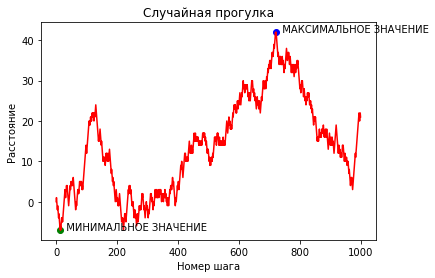

In [3]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(walk, linestyle = '-', color = 'r')
ax.set(title = 'Случайная прогулка', xlabel = 'Номер шага', ylabel = 'Расстояние')
ax.scatter(np.argmax(walk), np.max(walk), color = 'b')
ax.scatter(np.argmin(walk), np.min(walk), color = 'g')
plt.annotate('  МАКСИМАЛЬНОЕ ЗНАЧЕНИЕ', xy = (np.argmax(walk), np.max(walk))) #np.argmax ищет индекс max элемента
plt.annotate('  МИНИМАЛЬНОЕ ЗНАЧЕНИЕ', xy = (np.argmin(walk), np.min(walk)))
print('Максимальное значение по траектории:', np.max(walk),'\nМинимальное значение по траектории:', np.min(walk))

## 2. Найдем первый момент времени, когда на прогулке было сделано более 10 шагов в одну сторону

более 10 шагов в одну сторону было сделано начиная с шага: 88


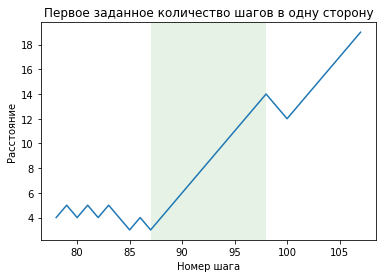

In [4]:
n =  10  #нужное количество шагов в одну сторону(т.е. больше чем это)
counter = 0
start = 0
for i in range(1,len(steps)-2):
    if steps[i] == steps[i+1]:
        counter += 1
    elif counter >= n:  #именно >=
        start = i - counter
        print("более", n, "шагов в одну сторону было сделано начиная с шага:",start)
        fig = plt.figure()         
        ax = fig.add_subplot(111)
        plt.plot(range(start-n,start+2*n),walk[start-n:start+2*n])
        ax.set(title = 'Первое заданное количество шагов в одну сторону', xlabel = 'Номер шага', ylabel = 'Расстояние')
        ax.axvspan(start - 1 ,start + n, alpha = 0.1, facecolor='g')
        break
    else:
        counter = 0
if start == 0:
    print("На прогулке не было сделано столько шагов подряд")

## 3. Найдем максимальное количество шагов в одну сторону

максимальное количество шагов в одну сторону: 11 
это было сделано начиная с шага: 88 
закончилось шагом: 98


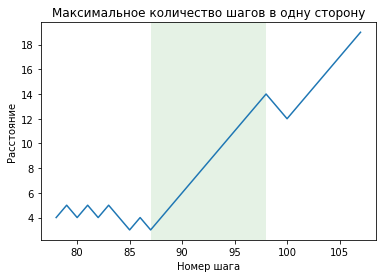

In [5]:
counter = 0
start = 0
max_steps = 0
for i in range(1,len(steps)-1):
    if steps[i] == steps[i+1]:
        counter += 1
    else:
        if counter > max_steps:
            max_steps = counter
            start = i - max_steps
        counter = 0
if counter > max_steps:
    max_steps = counter
    start = len(walk)-max_steps        

#Cтроим график и принтуем
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(range(start-max_steps,start+2*max_steps),walk[start-max_steps:start+2*max_steps])
ax.set(title = 'Максимальное количество шагов в одну сторону', xlabel = 'Номер шага', ylabel = 'Расстояние')
ax.axvspan(start - 1 ,start + max_steps, alpha = 0.1, facecolor='g')
print('максимальное количество шагов в одну сторону:', max_steps+1,'\nэто было сделано начиная с шага:', start,'\nзакончилось шагом:',start + max_steps )
